<a href="https://www.kaggle.com/code/rodrigoclporto/solving-linkedin-mini-sudoku-with-pyomo?scriptVersionId=290593083" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Solving LinkedIn Mini Sudoku with Linear Optimization

Just like I did with the Queens, Tango, and Zip minigames, in this notebook I will show you how to model and solve the LinkedIn Mini Sudoku using Linear Optimization (LO).

# Sudoku

<figure style="text-align:center;">
    <figcaption>Example of a classic Sudoku puzzle.</figcaption>
    <img src="https://cdn.jsdelivr.net/gh/rodrigo-cl-porto/Solving-LinkedIn-Minigames-with-Linear-Optimization/assets/sudoku_example.png" alt="Sudoku table" style="width:30%;" >
    <figcaption>Source: <a href="https://en.wikipedia.org/wiki/Sudoku">Wikipedia</a></figcaption>
</figure>

Mini Sudoku is based on the classic Sudoku game (from the Japanese 数独, meaning "unique numbers" in a free translation), which originally consists of a 9x9 grid and 9 smaller 3x3 matrices, with some squares already pre-filled with digits from 1 to 9. The meaning of its name is due to its objective of filling all the squares without repeating digits in the rows, columns, and smaller grids.

## How to Play Mini Sudoku

<figure style="text-align:center;">
    <figcaption>Mini Sudoku No. 60</figcaption>
    <img src="https://cdn.jsdelivr.net/gh/rodrigo-cl-porto/Solving-LinkedIn-Minigames-with-Linear-Optimization/assets/mini_sudoku_example.png" alt="Mini Sudoku No. 60" style="width:30%;" >
    <figcaption>Source: LinkedIn</figcaption>
</figure>

In the case of Mini Sudoku, the game consists of a grid with smaller dimensions than the classic, 6x6 grid, composed of 2x3 submatrices. The example to be solved in this notebook will be game number 60, published on LinkedIn on October 10, 2025, shown in the image below.

### Objective

- Fill all the empty spaces in the game grid with digits from 1 to 6

### Rules

- Each row, column, and mini-grid of the main game matrix must be filled with a digit from 1 to 6, without repetition in each row, column, or smaller grid.

# Problem Modeling

As I did in my previous articles, the <abbr title="Linear Optimization">LO</abbr> model for the Mini Sudoku game requires the definition of the following components:

- **Ranges**
- **Sets**
- **Objective function**
- **Constraints**

First, let's define these components considering the most general scenario for building the Abstract Model for the Sudoku game before defining them for the more specific case of Mini Sudoku.

## Ranges

In order to consider the most general cases, five ranges will be considered: $I$ and $J$ to represent the dimensions of the main grid, $U$ and $V$ for the dimensions of the smaller grids, and an interval $K$ for the range of possible values a square can receive.

- $I = \{1, \cdots, n\}$ represents the range of rows, where $n$ is the total number of rows (in this case, $n = 6$);
- $J = \{1, \cdots, n\}$ represents the range of columns, where the total number of columns is equal to the number of rows for dealing with a square matrix;
- $K = \{1,\cdots, n\}$ represents the range of possible values, where $n$ is the total number of possible digits, which is expected to be equal to the $n$ dimensions of the grid;
- $U = \{1, \cdots, p\}$ represents the number of rows in the game's submatrices, where $p$ is the total number of rows in each submatrix;
- $V = \{1, \cdots, q\}$ represents the number of columns in the game's submatrices, where $q$ is the total number of columns in each submatrix, which is expected to be $pq = n$, that is, the number of squares in each submatrix should be equal to the number of possible digits.

## Sets

To facilitate the definition of the constraints, it is important to define at least the set $S$ of submatrices and $F$ of pre-filled squares. Furthermore, it is necessary to clearly define which squares of the board comprise each of the submatrices $S_{vu}$. For example, the first submatrix $S_{11}$ is composed of squares in rows 1 and 2 and columns whose index ranges go from 1 to 3. $S_{12}$ is also composed of squares in rows 1 and 2, but the column indices range from 4 to 6, which is the second half of the column range; and so on for the remaining $S_{vu}$.

Note that the indices of the $v$ and $u$ of the submatrices correspond respectively to the indices of the columns and rows. The order is reversed because, for submatrices of dimensions 2x3, their arrangement in the main matrix is in the 3x2 format.

- $S = \{S_{vu} \mid \forall v \in V, \forall u \in U\}$ is the set of submatrices $S_{vu}$ existing in the game;
- $S_{vu} = \{(i, j) \mid \forall i \in \{p(v-1)+1, \cdots, pv\}, \forall j \in \{q(u-1)+1, \cdots, qu\}\}$ is the set of squares $(i, j) \subseteq I \times J$ that belong to the submatrix $S_{vu}$;
- $F = \{(i, j, k) \mid i \in I, j \in J, k \in K\} \subseteq I \times J \times K$ is the subset of pre-filled squares.

## Decision Variables

The decision variables will be binary $x_{ijk}$, representing the decision of whether square $(i, j)$ is filled with the value $k$. Therefore, as with the models of the other LinkedIn minigames, the Mini Sudoku is a <abbr title="Binary Linear Optimization Problem">BLOP</abbr>.

- $x_{ijk}$ = 1 if square $(i, j)$ is filled with the digit $k$;
- $x_{ijk}$ = 0 otherwise.

## Objective Function

Once again, as in previous articles, the Sudoku optimization problem does not have a function to be optimized, since we only want to find a solution that satisfies all the rules of the game. Therefore, the BLPP is a feasibility problem, whose objective function consists of maximizing (or minimizing) an arbitrary constant.

$$\text{Max} \ C$$

## Constraints

Finally, with all the previously defined components, let's translate the Sudoku rules into mathematical formulations for the PPLB model.

**Binary Constraints** — First of all, it's important to clearly state the binary nature of the decision variables in the constraint set.

$$x_{ijk} \in \{0, 1\}, \forall (i, j, k) \in I \times J \times K $$

**Unique-Digits-Per-Row Constraints** — Since there can be no repetition of values for each row, the sum of the $x_{ijk}$ for each row $i$ must be equal to 1, and there must be a such constraint for column $j$ and for each digit $k$, which in the case of Mini Sudoku will result in 36 constraints.

$$\sum_{j \in J}{x_{ijk}}=1, \forall i \in I, \forall k \in K$$

**Unique-Digits-Per-Column Constraints** — The same logic applies to each column $j$ of the game, with one constraint for each row $i$ and possible digit $k$, resulting in 36 more constraints.

$$\sum_{i \in I}{x_{ijk}}=1, \forall j \in J, \forall k \in K$$

**Unique-Digits-Per-Submatrix Constraints** — With the set $S$ of submatrices already well defined, it becomes easier to define the set of constraints that prevent repetition of digits for each submatrix $S_{vu}$.

$$\sum_{(i,j) \in S_{vu}}{x_{ijk}}=1, \forall S_{vu} \in S, \forall k \in K$$

**Single-Digit-Per-Square Constraints** — In addition, it is necessary to impose a set of constraints to prevent a square from being filled with more than one digit, which is achieved if the sum of $x_{ijk}$ is equal to 1 for each square $(i, j)$ existing in the game; therefore, 36 more constraints in the case of Mini Sudoku.

$$\sum_{k \in K}{x_{ijk}}=1, \forall i \in I, \forall j \in J$$

**Already-Filled-Squares Constraints** — Finally, for each already filled square, we must remember to impose that $x_{ijk} = 1$ if the square $(i, j)$ is already filled with the digit $k$.

$$x_{ijk}=1, \forall (i,j,k) \in F$$

# Abstract Model

With all the components defined, we have now assembled the abstract model for a Sudoku game. It's important to remember that this model assumes the game's submatrices will be rectangular with dimensions $p \times q$, such that $pq = n$.

$$
\begin{array}{lll}
& \text{Max } C & \\
\text{S.a.:} & & \\
& \sum_{i \in I}{x_{ijk}}=1, & \forall j \in J, \forall k \in K \\
& \sum_{j \in J}{x_{ijk}}=1, & \forall i \in I, \forall k \in K \\
& \sum_{k \in K}{x_{ijk}}=1, & \forall i \in I, \forall j \in J \\
& \sum_{(i,j) \in S_{vu}}{x_{ijk}}=1, & \forall S_{vu} \in S, \forall k \in K \\
& x_{ijk}=1, & \forall (i, j,k) \in F \\
& x_{ijk} \in \{0,1\}, & \forall (i,j,k) \in I \times J \times K \\
\end{array}
$$

# Concrete Model

Thus, it is possible to instantiate a concrete model for Mini Sudoku game No. 60 from the abstract model.

**Objective Function**

- $ \text{Max} \ 0$

**S.t.**:

(_Unique-Digits-Per-Row Constraints_)

- $x_{111} + x_{121} + x_{131} + x_{141} + x_{151} + x_{161} = 1$ (_Digit 1 on Row 1_)
- $x_{211} + x_{221} + x_{231} + x_{241} + x_{251} + x_{261} = 1$ (_Digit 1 on Row 2_)
- $x_{311} + x_{321} + x_{331} + x_{341} + x_{351} + x_{361} = 1$ (_Digit 1 on Row 3_)
- $x_{411} + x_{421} + x_{431} + x_{441} + x_{451} + x_{461} = 1$ (_Digit 1 on Row 4_)
- $x_{511} + x_{521} + x_{531} + x_{541} + x_{551} + x_{561} = 1$ (_Digit 1 on Row 5_)
- $x_{611} + x_{621} + x_{631} + x_{641} + x_{651} + x_{661} = 1$ (_Digit 1 on Row 6_)
- $x_{112} + x_{122} + x_{132} + x_{142} + x_{152} + x_{162} = 1$ (_Digit 2 on Row 1_)
- $x_{212} + x_{222} + x_{232} + x_{242} + x_{252} + x_{262} = 1$ (_Digit 2 on Row 2_)
- $x_{312} + x_{322} + x_{332} + x_{342} + x_{352} + x_{362} = 1$ (_Digit 2 on Row 3_)
- $x_{412} + x_{422} + x_{432} + x_{442} + x_{452} + x_{462} = 1$ (_Digit 2 on Row 4_)
- $x_{512} + x_{522} + x_{532} + x_{542} + x_{552} + x_{562} = 1$ (_Digit 2 on Row 5_)
- $x_{612} + x_{622} + x_{632} + x_{642} + x_{652} + x_{662} = 1$ (_Digit 2 on Row 6_)
- $x_{113} + x_{123} + x_{133} + x_{143} + x_{153} + x_{163} = 1$ (_Digit 3 on Row 1_)
- $x_{213} + x_{223} + x_{233} + x_{243} + x_{253} + x_{263} = 1$ (_Digit 3 on Row 2_)
- $x_{313} + x_{323} + x_{333} + x_{343} + x_{353} + x_{363} = 1$ (_Digit 3 on Row 3_)
- $x_{413} + x_{423} + x_{433} + x_{443} + x_{453} + x_{463} = 1$ (_Digit 3 on Row 4_)
- $x_{513} + x_{523} + x_{533} + x_{543} + x_{553} + x_{563} = 1$ (_Digit 3 on Row 5_)
- $x_{613} + x_{623} + x_{633} + x_{643} + x_{653} + x_{663} = 1$ (_Digit 3 on Row 6_)
- $x_{114} + x_{124} + x_{134} + x_{144} + x_{154} + x_{164} = 1$ (_Digit 4 on Row 1_)
- $x_{214} + x_{224} + x_{234} + x_{244} + x_{254} + x_{264} = 1$ (_Digit 4 on Row 2_)
- $x_{314} + x_{324} + x_{334} + x_{344} + x_{354} + x_{364} = 1$ (_Digit 4 on Row 3_)
- $x_{414} + x_{424} + x_{434} + x_{444} + x_{454} + x_{464} = 1$ (_Digit 4 on Row 4_)
- $x_{514} + x_{524} + x_{534} + x_{544} + x_{554} + x_{564} = 1$ (_Digit 4 on Row 5_)
- $x_{614} + x_{624} + x_{634} + x_{644} + x_{654} + x_{664} = 1$ (_Digit 4 on Row 6_)
- $x_{115} + x_{125} + x_{135} + x_{145} + x_{155} + x_{165} = 1$ (_Digit 5 on Row 1_)
- $x_{215} + x_{225} + x_{235} + x_{245} + x_{255} + x_{265} = 1$ (_Digit 5 on Row 2_)
- $x_{315} + x_{325} + x_{335} + x_{345} + x_{355} + x_{365} = 1$ (_Digit 5 on Row 3_)
- $x_{415} + x_{425} + x_{435} + x_{445} + x_{455} + x_{465} = 1$ (_Digit 5 on Row 4_)
- $x_{515} + x_{525} + x_{535} + x_{545} + x_{555} + x_{565} = 1$ (_Digit 5 on Row 5_)
- $x_{615} + x_{625} + x_{635} + x_{645} + x_{655} + x_{665} = 1$ (_Digit 5 on Row 6_)
- $x_{116} + x_{126} + x_{136} + x_{146} + x_{156} + x_{166} = 1$ (_Digit 6 on Row 1_)
- $x_{216} + x_{226} + x_{236} + x_{246} + x_{256} + x_{266} = 1$ (_Digit 6 on Row 2_)
- $x_{316} + x_{326} + x_{336} + x_{346} + x_{356} + x_{366} = 1$ (_Digit 6 on Row 3_)
- $x_{416} + x_{426} + x_{436} + x_{446} + x_{456} + x_{466} = 1$ (_Digit 6 on Row 4_)
- $x_{516} + x_{526} + x_{536} + x_{546} + x_{556} + x_{566} = 1$ (_Digit 6 on Row 5_)
- $x_{616} + x_{626} + x_{636} + x_{646} + x_{656} + x_{666} = 1$ (_Digit 6 on Row 6_)

(_Unique-Digits-Per-Column Constraints_)

- $x_{111} + x_{211} + x_{311} + x_{411} + x_{511} + x_{611} = 1$ (_Digit 1 on Column 1_)
- $x_{121} + x_{221} + x_{321} + x_{421} + x_{521} + x_{621} = 1$ (_Digit 1 on Column 2_)
- $x_{131} + x_{231} + x_{331} + x_{431} + x_{531} + x_{631} = 1$ (_Digit 1 on Column 3_)
- $x_{141} + x_{241} + x_{341} + x_{441} + x_{541} + x_{641} = 1$ (_Digit 1 on Column 4_)
- $x_{151} + x_{251} + x_{351} + x_{451} + x_{551} + x_{651} = 1$ (_Digit 1 on Column 5_)
- $x_{161} + x_{261} + x_{361} + x_{461} + x_{561} + x_{661} = 1$ (_Digit 1 on Column 6_)
- $x_{112} + x_{212} + x_{312} + x_{412} + x_{512} + x_{612} = 1$ (_Digit 2 on Column 1_)
- $x_{122} + x_{222} + x_{322} + x_{422} + x_{522} + x_{622} = 1$ (_Digit 2 on Column 2_)
- $x_{132} + x_{232} + x_{332} + x_{432} + x_{532} + x_{632} = 1$ (_Digit 2 on Column 3_)
- $x_{142} + x_{242} + x_{342} + x_{442} + x_{542} + x_{642} = 1$ (_Digit 2 on Column 4_)
- $x_{152} + x_{252} + x_{352} + x_{452} + x_{552} + x_{652} = 1$ (_Digit 2 on Column 5_)
- $x_{162} + x_{262} + x_{362} + x_{462} + x_{562} + x_{662} = 1$ (_Digit 2 on Column 6_)
- $x_{113} + x_{213} + x_{313} + x_{413} + x_{513} + x_{613} = 1$ (_Digit 3 on Column 1_)
- $x_{123} + x_{223} + x_{323} + x_{423} + x_{523} + x_{623} = 1$ (_Digit 3 on Column 2_)
- $x_{133} + x_{233} + x_{333} + x_{433} + x_{533} + x_{633} = 1$ (_Digit 3 on Column 3_)
- $x_{143} + x_{243} + x_{343} + x_{443} + x_{543} + x_{643} = 1$ (_Digit 3 on Column 4_)
- $x_{153} + x_{253} + x_{353} + x_{453} + x_{553} + x_{653} = 1$ (_Digit 3 on Column 5_)
- $x_{163} + x_{263} + x_{363} + x_{463} + x_{563} + x_{663} = 1$ (_Digit 3 on Column 6_)
- $x_{114} + x_{214} + x_{314} + x_{414} + x_{514} + x_{614} = 1$ (_Digit 4 on Column 1_)
- $x_{124} + x_{224} + x_{324} + x_{424} + x_{524} + x_{624} = 1$ (_Digit 4 on Column 2_)
- $x_{134} + x_{234} + x_{334} + x_{434} + x_{534} + x_{634} = 1$ (_Digit 4 on Column 3_)
- $x_{144} + x_{244} + x_{344} + x_{444} + x_{544} + x_{644} = 1$ (_Digit 4 on Column 4_)
- $x_{154} + x_{254} + x_{354} + x_{454} + x_{554} + x_{654} = 1$ (_Digit 4 on Column 5_)
- $x_{164} + x_{264} + x_{364} + x_{464} + x_{564} + x_{664} = 1$ (_Digit 4 on Column 6_)
- $x_{115} + x_{215} + x_{315} + x_{415} + x_{515} + x_{615} = 1$ (_Digit 5 on Column 1_)
- $x_{125} + x_{225} + x_{325} + x_{425} + x_{525} + x_{625} = 1$ (_Digit 5 on Column 2_)
- $x_{135} + x_{235} + x_{335} + x_{435} + x_{535} + x_{635} = 1$ (_Digit 5 on Column 3_)
- $x_{145} + x_{245} + x_{345} + x_{445} + x_{545} + x_{645} = 1$ (_Digit 5 on Column 4_)
- $x_{155} + x_{255} + x_{355} + x_{455} + x_{555} + x_{655} = 1$ (_Digit 5 on Column 5_)
- $x_{165} + x_{265} + x_{365} + x_{465} + x_{565} + x_{665} = 1$ (_Digit 5 on Column 6_)
- $x_{116} + x_{216} + x_{316} + x_{416} + x_{516} + x_{616} = 1$ (_Digit 6 on Column 1_)
- $x_{126} + x_{226} + x_{326} + x_{426} + x_{526} + x_{626} = 1$ (_Digit 6 on Column 2_)
- $x_{136} + x_{236} + x_{336} + x_{436} + x_{536} + x_{636} = 1$ (_Digit 6 on Column 3_)
- $x_{146} + x_{246} + x_{346} + x_{446} + x_{546} + x_{646} = 1$ (_Digit 6 on Column 4_)
- $x_{156} + x_{256} + x_{356} + x_{456} + x_{556} + x_{656} = 1$ (_Digit 6 on Column 5_)
- $x_{166} + x_{266} + x_{366} + x_{466} + x_{566} + x_{666} = 1$ (_Digit 6 on Column 6_)

(_Unique-Digits-Per-Submatrix Constraints_)

- $x_{111} + x_{121} + x_{131} + x_{211} + x_{221} + x_{231} = 1$ (_Digit 1 on Submatrix $S_{11}$_)
- $x_{112} + x_{122} + x_{132} + x_{212} + x_{222} + x_{232} = 1$ (_Digit 2 on Submatrix $S_{11}$_)
- $x_{113} + x_{123} + x_{133} + x_{213} + x_{223} + x_{233} = 1$ (_Digit 3 on Submatrix $S_{11}$_)
- $x_{114} + x_{124} + x_{134} + x_{214} + x_{224} + x_{234} = 1$ (_Digit 4 on Submatrix $S_{11}$_)
- $x_{115} + x_{125} + x_{135} + x_{215} + x_{225} + x_{235} = 1$ (_Digit 5 on Submatrix $S_{11}$_)
- $x_{116} + x_{126} + x_{136} + x_{216} + x_{226} + x_{236} = 1$ (_Digit 6 on Submatrix $S_{11}$_)
- $x_{141} + x_{151} + x_{161} + x_{241} + x_{251} + x_{261} = 1$ (_Digit 1 on Submatrix $S_{12}$_)
- $x_{142} + x_{152} + x_{162} + x_{242} + x_{252} + x_{262} = 1$ (_Digit 2 on Submatrix $S_{12}$_)
- $x_{143} + x_{153} + x_{163} + x_{243} + x_{253} + x_{263} = 1$ (_Digit 3 on Submatrix $S_{12}$_)
- $x_{144} + x_{154} + x_{164} + x_{244} + x_{254} + x_{264} = 1$ (_Digit 4 on Submatrix $S_{12}$_)
- $x_{145} + x_{155} + x_{165} + x_{245} + x_{255} + x_{265} = 1$ (_Digit 5 on Submatrix $S_{12}$_)
- $x_{146} + x_{156} + x_{166} + x_{246} + x_{256} + x_{266} = 1$ (_Digit 6 on Submatrix $S_{12}$_)
- $x_{311} + x_{321} + x_{331} + x_{411} + x_{421} + x_{431} = 1$ (_Digit 1 on Submatrix $S_{21}$_)
- $x_{312} + x_{322} + x_{332} + x_{412} + x_{422} + x_{432} = 1$ (_Digit 2 on Submatrix $S_{21}$_)
- $x_{313} + x_{323} + x_{333} + x_{413} + x_{423} + x_{433} = 1$ (_Digit 3 on Submatrix $S_{21}$_)
- $x_{314} + x_{324} + x_{334} + x_{414} + x_{424} + x_{434} = 1$ (_Digit 4 on Submatrix $S_{21}$_)
- $x_{315} + x_{325} + x_{335} + x_{415} + x_{425} + x_{435} = 1$ (_Digit 5 on Submatrix $S_{21}$_)
- $x_{316} + x_{326} + x_{336} + x_{416} + x_{426} + x_{436} = 1$ (_Digit 6 on Submatrix $S_{21}$_)
- $x_{341} + x_{351} + x_{331} + x_{441} + x_{451} + x_{431} = 1$ (_Digit 1 on Submatrix $S_{22}$_)
- $x_{342} + x_{352} + x_{362} + x_{442} + x_{452} + x_{462} = 1$ (_Digit 2 on Submatrix $S_{22}$_)
- $x_{343} + x_{353} + x_{363} + x_{443} + x_{453} + x_{463} = 1$ (_Digit 3 on Submatrix $S_{22}$_)
- $x_{344} + x_{354} + x_{364} + x_{444} + x_{454} + x_{464} = 1$ (_Digit 4 on Submatrix $S_{22}$_)
- $x_{345} + x_{355} + x_{365} + x_{445} + x_{455} + x_{465} = 1$ (_Digit 5 on Submatrix $S_{22}$_)
- $x_{346} + x_{356} + x_{366} + x_{446} + x_{456} + x_{466} = 1$ (_Digit 6 on Submatrix $S_{22}$_)
- $x_{511} + x_{521} + x_{531} + x_{611} + x_{621} + x_{631} = 1$ (_Digit 1 on Submatrix $S_{31}$_)
- $x_{512} + x_{522} + x_{532} + x_{612} + x_{622} + x_{632} = 1$ (_Digit 2 on Submatrix $S_{31}$_)
- $x_{513} + x_{523} + x_{533} + x_{613} + x_{623} + x_{633} = 1$ (_Digit 3 on Submatrix $S_{31}$_)
- $x_{514} + x_{524} + x_{534} + x_{614} + x_{624} + x_{634} = 1$ (_Digit 4 on Submatrix $S_{31}$_)
- $x_{515} + x_{525} + x_{535} + x_{615} + x_{625} + x_{635} = 1$ (_Digit 5 on Submatrix $S_{31}$_)
- $x_{516} + x_{526} + x_{536} + x_{616} + x_{626} + x_{636} = 1$ (_Digit 6 on Submatrix $S_{31}$_)
- $x_{541} + x_{551} + x_{561} + x_{641} + x_{651} + x_{631} = 1$ (_Digit 1 on Submatrix $S_{32}$_)
- $x_{542} + x_{552} + x_{562} + x_{642} + x_{652} + x_{662} = 1$ (_Digit 2 on Submatrix $S_{32}$_)
- $x_{543} + x_{553} + x_{563} + x_{643} + x_{653} + x_{663} = 1$ (_Digit 3 on Submatrix $S_{32}$_)
- $x_{544} + x_{554} + x_{564} + x_{644} + x_{654} + x_{664} = 1$ (_Digit 4 on Submatrix $S_{32}$_)
- $x_{545} + x_{555} + x_{565} + x_{645} + x_{655} + x_{665} = 1$ (_Digit 5 on Submatrix $S_{32}$_)
- $x_{546} + x_{556} + x_{566} + x_{646} + x_{656} + x_{666} = 1$ (_Digit 6 on Submatrix $S_{32}$_)

(_Single-Digit-Per-Square Constraints_)

- $x_{111} + x_{112} + x_{113} + x_{114} + x_{115} + x_{116} = 1$ (_Square (1, 1)_)
- $x_{121} + x_{122} + x_{123} + x_{124} + x_{125} + x_{126} = 1$ (_Square (1, 2)_)
- $x_{131} + x_{132} + x_{133} + x_{134} + x_{135} + x_{136} = 1$ (_Square (1, 3)_)
- $x_{141} + x_{142} + x_{143} + x_{144} + x_{145} + x_{146} = 1$ (_Square (1, 4)_)
- $x_{151} + x_{152} + x_{153} + x_{154} + x_{155} + x_{156} = 1$ (_Square (1, 5)_)
- $x_{161} + x_{162} + x_{163} + x_{164} + x_{165} + x_{166} = 1$ (_Square (1, 6)_)
- $x_{211} + x_{212} + x_{213} + x_{214} + x_{215} + x_{216} = 1$ (_Square (2, 1)_)
- $x_{221} + x_{222} + x_{223} + x_{224} + x_{225} + x_{226} = 1$ (_Square (2, 2)_)
- $x_{231} + x_{232} + x_{233} + x_{234} + x_{235} + x_{236} = 1$ (_Square (2, 3)_)
- $x_{241} + x_{242} + x_{243} + x_{244} + x_{245} + x_{246} = 1$ (_Square (2, 4)_)
- $x_{251} + x_{252} + x_{253} + x_{254} + x_{255} + x_{256} = 1$ (_Square (2, 5)_)
- $x_{261} + x_{262} + x_{263} + x_{264} + x_{265} + x_{266} = 1$ (_Square (2, 6)_)
- $x_{311} + x_{312} + x_{313} + x_{314} + x_{315} + x_{316} = 1$ (_Square (3, 1)_)
- $x_{321} + x_{322} + x_{323} + x_{324} + x_{325} + x_{326} = 1$ (_Square (3, 2)_)
- $x_{331} + x_{332} + x_{333} + x_{334} + x_{335} + x_{336} = 1$ (_Square (3, 3)_)
- $x_{341} + x_{342} + x_{343} + x_{344} + x_{345} + x_{346} = 1$ (_Square (3, 4)_)
- $x_{351} + x_{352} + x_{353} + x_{354} + x_{355} + x_{356} = 1$ (_Square (3, 5)_)
- $x_{361} + x_{362} + x_{363} + x_{364} + x_{365} + x_{366} = 1$ (_Square (3, 6)_)
- $x_{411} + x_{412} + x_{413} + x_{414} + x_{415} + x_{416} = 1$ (_Square (4, 1)_)
- $x_{421} + x_{422} + x_{423} + x_{424} + x_{425} + x_{426} = 1$ (_Square (4, 2)_)
- $x_{431} + x_{432} + x_{433} + x_{434} + x_{435} + x_{436} = 1$ (_Square (4, 3)_)
- $x_{441} + x_{442} + x_{443} + x_{444} + x_{445} + x_{446} = 1$ (_Square (4, 4)_)
- $x_{451} + x_{452} + x_{453} + x_{454} + x_{455} + x_{456} = 1$ (_Square (4, 5)_)
- $x_{461} + x_{462} + x_{463} + x_{464} + x_{465} + x_{466} = 1$ (_Square (4, 6)_)
- $x_{511} + x_{512} + x_{513} + x_{514} + x_{515} + x_{516} = 1$ (_Square (5, 1)_)
- $x_{521} + x_{522} + x_{523} + x_{524} + x_{525} + x_{526} = 1$ (_Square (5, 2)_)
- $x_{531} + x_{532} + x_{533} + x_{534} + x_{535} + x_{536} = 1$ (_Square (5, 3)_)
- $x_{541} + x_{542} + x_{543} + x_{544} + x_{545} + x_{546} = 1$ (_Square (5, 4)_)
- $x_{551} + x_{552} + x_{553} + x_{554} + x_{555} + x_{556} = 1$ (_Square (5, 5)_)
- $x_{561} + x_{562} + x_{563} + x_{564} + x_{565} + x_{566} = 1$ (_Square (5, 6)_)
- $x_{611} + x_{612} + x_{613} + x_{614} + x_{615} + x_{616} = 1$ (_Square (6, 1)_)
- $x_{621} + x_{622} + x_{623} + x_{624} + x_{625} + x_{626} = 1$ (_Square (6, 2)_)
- $x_{631} + x_{632} + x_{633} + x_{634} + x_{635} + x_{636} = 1$ (_Square (6, 3)_)
- $x_{641} + x_{642} + x_{643} + x_{644} + x_{645} + x_{646} = 1$ (_Square (6, 4)_)
- $x_{651} + x_{652} + x_{653} + x_{654} + x_{655} + x_{656} = 1$ (_Square (6, 5)_)
- $x_{661} + x_{662} + x_{663} + x_{664} + x_{665} + x_{666} = 1$ (_Square (6, 6)_)

(_Already-Filled-Squares Constraints_)

- $x_{111} = 1$ (_Digit 1 on Square (1, 1)_)
- $x_{222} = 1$ (_Digit 2 on Square (2, 2)_)
- $x_{253} = 1$ (_Digit 3 on Square (2, 5)_)
- $x_{346} = 1$ (_Digit 6 on Square (3, 4)_)
- $x_{435} = 1$ (_Digit 5 on Square (4, 3)_)
- $x_{444} = 1$ (_Digit 4 on Square (4, 4)_)
- $x_{524} = 1$ (_Digit 4 on Square (5, 2)_)
- $x_{555} = 1$ (_Digit 5 on Square (5, 5)_)
- $x_{666} = 1$ (_Digit 6 on Square (6, 6)_)

(_Binary Constraints_)

- $x_{111} \in \{0,1\}$
- $x_{112} \in \{0,1\}$
- $x_{113} \in \{0,1\}$
- $x_{114} \in \{0,1\}$
- $x_{115} \in \{0,1\}$
- $x_{116} \in \{0,1\}$
- $x_{121} \in \{0,1\}$
- $x_{122} \in \{0,1\}$
- $x_{123} \in \{0,1\}$
- $x_{124} \in \{0,1\}$
- $x_{125} \in \{0,1\}$
- $x_{126} \in \{0,1\}$
- $x_{131} \in \{0,1\}$
- $x_{132} \in \{0,1\}$
- $x_{133} \in \{0,1\}$
- $x_{134} \in \{0,1\}$
- $x_{135} \in \{0,1\}$
- $x_{136} \in \{0,1\}$
- $x_{141} \in \{0,1\}$
- $x_{142} \in \{0,1\}$
- $x_{143} \in \{0,1\}$
- $x_{144} \in \{0,1\}$
- $x_{145} \in \{0,1\}$
- $x_{146} \in \{0,1\}$
- $x_{151} \in \{0,1\}$
- $x_{152} \in \{0,1\}$
- $x_{153} \in \{0,1\}$
- $x_{154} \in \{0,1\}$
- $x_{155} \in \{0,1\}$
- $x_{156} \in \{0,1\}$
- $x_{161} \in \{0,1\}$
- $x_{162} \in \{0,1\}$
- $x_{163} \in \{0,1\}$
- $x_{164} \in \{0,1\}$
- $x_{165} \in \{0,1\}$
- $x_{166} \in \{0,1\}$
- $x_{211} \in \{0,1\}$
- $x_{212} \in \{0,1\}$
- $x_{213} \in \{0,1\}$
- $x_{214} \in \{0,1\}$
- $x_{215} \in \{0,1\}$
- $x_{216} \in \{0,1\}$
- $x_{221} \in \{0,1\}$
- $x_{222} \in \{0,1\}$
- $x_{223} \in \{0,1\}$
- $x_{224} \in \{0,1\}$
- $x_{225} \in \{0,1\}$
- $x_{226} \in \{0,1\}$
- $x_{231} \in \{0,1\}$
- $x_{232} \in \{0,1\}$
- $x_{233} \in \{0,1\}$
- $x_{234} \in \{0,1\}$
- $x_{235} \in \{0,1\}$
- $x_{236} \in \{0,1\}$
- $x_{241} \in \{0,1\}$
- $x_{242} \in \{0,1\}$
- $x_{243} \in \{0,1\}$
- $x_{244} \in \{0,1\}$
- $x_{245} \in \{0,1\}$
- $x_{246} \in \{0,1\}$
- $x_{251} \in \{0,1\}$
- $x_{252} \in \{0,1\}$
- $x_{253} \in \{0,1\}$
- $x_{254} \in \{0,1\}$
- $x_{255} \in \{0,1\}$
- $x_{256} \in \{0,1\}$
- $x_{261} \in \{0,1\}$
- $x_{262} \in \{0,1\}$
- $x_{263} \in \{0,1\}$
- $x_{264} \in \{0,1\}$
- $x_{265} \in \{0,1\}$
- $x_{266} \in \{0,1\}$
- $x_{311} \in \{0,1\}$
- $x_{312} \in \{0,1\}$
- $x_{313} \in \{0,1\}$
- $x_{314} \in \{0,1\}$
- $x_{315} \in \{0,1\}$
- $x_{316} \in \{0,1\}$
- $x_{321} \in \{0,1\}$
- $x_{322} \in \{0,1\}$
- $x_{323} \in \{0,1\}$
- $x_{324} \in \{0,1\}$
- $x_{325} \in \{0,1\}$
- $x_{326} \in \{0,1\}$
- $x_{331} \in \{0,1\}$
- $x_{332} \in \{0,1\}$
- $x_{333} \in \{0,1\}$
- $x_{334} \in \{0,1\}$
- $x_{335} \in \{0,1\}$
- $x_{336} \in \{0,1\}$
- $x_{341} \in \{0,1\}$
- $x_{342} \in \{0,1\}$
- $x_{343} \in \{0,1\}$
- $x_{344} \in \{0,1\}$
- $x_{345} \in \{0,1\}$
- $x_{346} \in \{0,1\}$
- $x_{351} \in \{0,1\}$
- $x_{352} \in \{0,1\}$
- $x_{353} \in \{0,1\}$
- $x_{354} \in \{0,1\}$
- $x_{355} \in \{0,1\}$
- $x_{356} \in \{0,1\}$
- $x_{361} \in \{0,1\}$
- $x_{362} \in \{0,1\}$
- $x_{363} \in \{0,1\}$
- $x_{364} \in \{0,1\}$
- $x_{365} \in \{0,1\}$
- $x_{366} \in \{0,1\}$
- $x_{411} \in \{0,1\}$
- $x_{412} \in \{0,1\}$
- $x_{413} \in \{0,1\}$
- $x_{414} \in \{0,1\}$
- $x_{415} \in \{0,1\}$
- $x_{416} \in \{0,1\}$
- $x_{421} \in \{0,1\}$
- $x_{422} \in \{0,1\}$
- $x_{423} \in \{0,1\}$
- $x_{424} \in \{0,1\}$
- $x_{425} \in \{0,1\}$
- $x_{426} \in \{0,1\}$
- $x_{431} \in \{0,1\}$
- $x_{432} \in \{0,1\}$
- $x_{433} \in \{0,1\}$
- $x_{434} \in \{0,1\}$
- $x_{435} \in \{0,1\}$
- $x_{436} \in \{0,1\}$
- $x_{441} \in \{0,1\}$
- $x_{442} \in \{0,1\}$
- $x_{443} \in \{0,1\}$
- $x_{444} \in \{0,1\}$
- $x_{445} \in \{0,1\}$
- $x_{446} \in \{0,1\}$
- $x_{451} \in \{0,1\}$
- $x_{452} \in \{0,1\}$
- $x_{453} \in \{0,1\}$
- $x_{454} \in \{0,1\}$
- $x_{455} \in \{0,1\}$
- $x_{456} \in \{0,1\}$
- $x_{461} \in \{0,1\}$
- $x_{462} \in \{0,1\}$
- $x_{463} \in \{0,1\}$
- $x_{464} \in \{0,1\}$
- $x_{465} \in \{0,1\}$
- $x_{466} \in \{0,1\}$
- $x_{511} \in \{0,1\}$
- $x_{512} \in \{0,1\}$
- $x_{513} \in \{0,1\}$
- $x_{514} \in \{0,1\}$
- $x_{515} \in \{0,1\}$
- $x_{516} \in \{0,1\}$
- $x_{521} \in \{0,1\}$
- $x_{522} \in \{0,1\}$
- $x_{523} \in \{0,1\}$
- $x_{524} \in \{0,1\}$
- $x_{525} \in \{0,1\}$
- $x_{526} \in \{0,1\}$
- $x_{531} \in \{0,1\}$
- $x_{532} \in \{0,1\}$
- $x_{533} \in \{0,1\}$
- $x_{534} \in \{0,1\}$
- $x_{535} \in \{0,1\}$
- $x_{536} \in \{0,1\}$
- $x_{541} \in \{0,1\}$
- $x_{542} \in \{0,1\}$
- $x_{543} \in \{0,1\}$
- $x_{544} \in \{0,1\}$
- $x_{545} \in \{0,1\}$
- $x_{546} \in \{0,1\}$
- $x_{551} \in \{0,1\}$
- $x_{552} \in \{0,1\}$
- $x_{553} \in \{0,1\}$
- $x_{554} \in \{0,1\}$
- $x_{555} \in \{0,1\}$
- $x_{556} \in \{0,1\}$
- $x_{561} \in \{0,1\}$
- $x_{562} \in \{0,1\}$
- $x_{563} \in \{0,1\}$
- $x_{564} \in \{0,1\}$
- $x_{565} \in \{0,1\}$
- $x_{566} \in \{0,1\}$
- $x_{611} \in \{0,1\}$
- $x_{612} \in \{0,1\}$
- $x_{613} \in \{0,1\}$
- $x_{614} \in \{0,1\}$
- $x_{615} \in \{0,1\}$
- $x_{616} \in \{0,1\}$
- $x_{621} \in \{0,1\}$
- $x_{622} \in \{0,1\}$
- $x_{623} \in \{0,1\}$
- $x_{624} \in \{0,1\}$
- $x_{625} \in \{0,1\}$
- $x_{626} \in \{0,1\}$
- $x_{631} \in \{0,1\}$
- $x_{632} \in \{0,1\}$
- $x_{633} \in \{0,1\}$
- $x_{634} \in \{0,1\}$
- $x_{635} \in \{0,1\}$
- $x_{636} \in \{0,1\}$
- $x_{641} \in \{0,1\}$
- $x_{642} \in \{0,1\}$
- $x_{643} \in \{0,1\}$
- $x_{644} \in \{0,1\}$
- $x_{645} \in \{0,1\}$
- $x_{646} \in \{0,1\}$
- $x_{651} \in \{0,1\}$
- $x_{652} \in \{0,1\}$
- $x_{653} \in \{0,1\}$
- $x_{654} \in \{0,1\}$
- $x_{655} \in \{0,1\}$
- $x_{656} \in \{0,1\}$
- $x_{661} \in \{0,1\}$
- $x_{662} \in \{0,1\}$
- $x_{663} \in \{0,1\}$
- $x_{664} \in \{0,1\}$
- $x_{665} \in \{0,1\}$
- $x_{666} \in \{0,1\}$

# Application with Pyomo

Just as I did with the Zip minigame on my last notebook, I decided to solve the Mini Sudoku using Pyomo, an open-source Python library focused on mathematical modeling. The great advantage of this library is that it allows the creation of the optimization model with few lines of code instead of having to define each of the model's components "manually", which would be necessary, for example, if we had to build the model in a spreadsheet before solving it with a solution software like Excel Solver or OpenSolver, which could demand a lot of time and attention depending on the size of the problem.

In the case of the Mini Sudoku, as you may have noticed, the model has a huge number of components. Considering only the constraints, there are 216 binary constraints (one for each $x_{ijk}$), 36 constraints for each set of constraints of unique digits per row, per column, per submatrix, and to guarantee a single digit per square (resulting in a total of 144 constraints), in addition to the constraints for pre-filled squares. In short, a simple Mini Sudoku game will have no fewer than 360 constraints, which is already a too large model to work with manually in a spreadsheet (it's more worthwhile to simply solve the game than to go through all the work of creating the model to solve it with Solver!).

Considering that the number of constraints in a Sudoku model is given by $C(n, k) = n^3 + 4n^2 + k$, where $n$ is the order of the square matrix and $k$ is the number of pre-filled squares, a common model of a classic Sudoku game, which has a 9x9 matrix, would have no fewer than 1,053 constraints! With Pyomo, not only is model creation greatly facilitated, but it's even possible to automate this process, simply by providing the problem data.

## Importing Libraries

The goal for this practical application is to create a function that receives a Sudoku in the form of a graph created by NetworkX, since it's more practical to handle Sudoku using graph object logic than primitive data types (lists, dictionaries, etc.).

Furthermore, we will use Matplotlib to display the solution of the Mini Sudoku after it has been solved by the Gurobi Optimizer.

Therefore, we will install these following libraries, as usual.

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pyomo.environ as pyo

## Solving Mini Sudoku

Before getting down to business, let's create a NetworkX graph that will represent an instance of the Mini Sudoku game in question.

<figure style="text-align:center;">
    <figcaption>Mini Sudoku No. 60</figcaption>
    <img src="../assets/mini_sudoku_example.png" alt="Mini Sudoku n.º 60" style="width:30%;" >
    <figcaption>Source: LinkedIn</figcaption>
</figure>

For this purpose, a `Sudoku` class will be created with the necessary methods for creating, solving, and displaying the Sudoku puzzle.

In [ ]:
class Sudoku():
    def __init__(self, n, grid:tuple):
        self.__n = n

        p, q = grid

        if p*q == n:
            self.__grid = grid
        else:
            raise ValueError("The dimensions of subgrid must match with the sudoku's length")
        
        G = nx.grid_2d_graph(n, n)
        nx.set_node_attributes(G, 0, 'value')
        self.matrix = G

    def set_value_to_square(self, square:tuple, value:int):
        square = tuple(i-1 for i in square)
        self.matrix.nodes[square]['value'] = value

    def get_value_from_square(self, square:tuple) -> int:
        square = tuple(i-1 for i in square)
        return self.matrix.nodes[square]['value']

    def solve(self):

        # STEP 1: Set the main inputs of the model.
        n = self.__n
        p, q = self.__grid
        filled_values = [
            (n[0]+1, n[1]+1, self.matrix.nodes[n]['value']) \
            for n in self.matrix.nodes() if self.matrix.nodes[n]['value'] != 0
        ]

        # 2nd STEP: Instantiate the Concrete Model.
        model = pyo.ConcreteModel()

        # 3rd STEP: Set the ranges
        I = model.I = pyo.RangeSet(n)
        J = model.J = pyo.RangeSet(n)
        K = model.K = pyo.RangeSet(n)
        U = model.u = pyo.RangeSet(p)
        V = model.v = pyo.RangeSet(q)

        # 4th STEP: Define the sets.
        S = model.Submatrices = pyo.Set(
            V, U,
            initialize= lambda model, v, u: \
            [(i, j) for i in range(p*(v-1)+1, p*v+1) for j in range(q*(u-1)+1, q*u+1)]
        )
        F = model.FilledValues = pyo.Set(initialize=filled_values)
        
        # 5th STEP: Set the binary decision variables..
        x = model.x = pyo.Var(I, J, K, within=pyo.Binary, initialize=0)
        
        # 6th STEP: PASSO: Set the Objective function.
        model.obj = pyo.Objective(expr=0, sense=pyo.maximize)
        
        # 7th STEP: Set the constraints.

        model.unique_digits_per_row_constraints = pyo.Constraint(
            J, K,
            rule=lambda model, j, k: sum(x[i,j,k] for i in I) == 1
        )

        model.unique_digits_per_column_constraints = pyo.Constraint(
            I, K,
            rule=lambda model, i, k: sum(x[i,j,k] for j in J) == 1
        )

        model.unique_digits_per_submatrix_constraints = pyo.Constraint(
            V, U, K,
            rule=lambda model, v, u, k: sum(x[i,j,k] for (i, j) in S[v,u]) == 1
        )

        model.single_digit_per_square_constraints = pyo.Constraint(
            I, J,
            rule=lambda model, i, j: sum(x[i,j,k] for k in K) == 1
        )

        model.alreadey_filled_squares_constraints = pyo.Constraint(
            F,
            rule=lambda model, i, j, k: x[i, j, k] == 1
        )
        
        # 8th STEP: Solve the model by Gurobi.
        solver = pyo.SolverFactory('gurobi')
        results = solver.solve(model)

        # 9th Step: Save the solution in the Sudoku grid.
        solution = [(i, j, k) for i in I for j in J for k in K if model.x[i, j, k].value == 1]
        for i, j, k in solution:
            self.set_value_to_square((i, j), k)
    
    def show(self):
        plt.figure(figsize=(5, 5))
        nx.draw(
            G= self.matrix,
            pos= {(i, j): (j, -i) for (i, j) in self.matrix.nodes()},
            with_labels= True,
            labels= {n: self.matrix.nodes[n]['value'] for n in self.matrix.nodes()},
            node_size= 900,
            node_shape='s',
            node_color= 'gray',
            edge_color = (0,0,0,0)
        )
        plt.show()

It's worth noting that the Sudoku class will only be instantiated if the product of the dimensions of the submatrix passed in the grid argument matches the size of the Sudoku puzzle.

This allows you to create and display the puzzle in question.

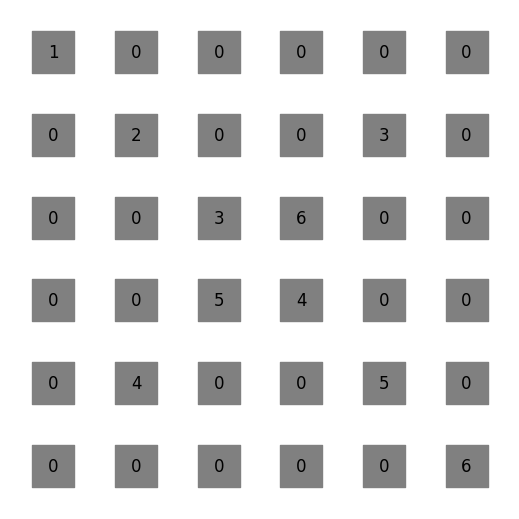

In [4]:
mini_sudoku = Sudoku(6, (2,3))
mini_sudoku.set_value_to_square((1,1), 1)
mini_sudoku.set_value_to_square((2,2), 2)
mini_sudoku.set_value_to_square((2,5), 3)
mini_sudoku.set_value_to_square((3,3), 3)
mini_sudoku.set_value_to_square((3,4), 6)
mini_sudoku.set_value_to_square((4,3), 5)
mini_sudoku.set_value_to_square((4,4), 4)
mini_sudoku.set_value_to_square((5,2), 4)
mini_sudoku.set_value_to_square((5,5), 5)
mini_sudoku.set_value_to_square((6,6), 6)

mini_sudoku.show()

With the game instantiated, simply solve it by calling the `solve()` method.

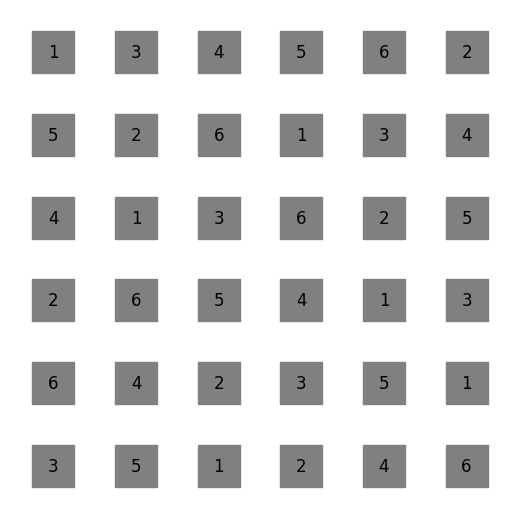

In [5]:
mini_sudoku.solve()
mini_sudoku.show()

Which corresponds exactly to the solution of the game, as expected.

<figure style="text-align:center;">
    <figcaption>Mini Sudoku No. 60's Solution</figcaption>
    <img src="https://cdn.jsdelivr.net/gh/rodrigo-cl-porto/Solving-LinkedIn-Minigames-with-Linear-Optimization/assets/mini_sudoku_solution.png" alt="Sudoku solution" style="width:30%;" >
    <figcaption>Source: LinkedIn</figcaption>
</figure>

# References

- Mini Sudoku. LinkedIn. Available at https://www.linkedin.com/games/mini-sudoku/. Accessed on October 10th, 2025.
- TAKANO, Kevin; DE FREITAS, Rosiane and DE SÁ, Vinícius Gusmão. O jogo de lógica Sudoku: modelagem teórica, NP-Completude e estratégias algorítmicas exatas e heurísticas. In: CONCURSO DE TRABALHOS DE INICIAÇÃO CIENTÍFICA DA SBC (CTIC-SBC), 34., 2015, Recife. Anais […]. Porto Alegre: Sociedade Brasileira de Computação, 2015. p. 71–80.
- Sudoku. Wikipedia. May 7, 2025. Available at https://en.wikipedia.org/wiki/Sudoku. Accessed on October 10th, 2025.